### Seaborn plotting

How does seaborn work and how can you manipulate it to get the best plots?

In [5]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Seaborn basics  
We'll use the blueberries dataset to explore how a seaborn plot works

Numpy is the python library for handling maths.  
Matplotlib is a python library built on Numpy which draws plots.  
Seaborn is a python library built on Numpy, pandas and matllibplot which draws beautiful, customisable plots.  

There is LOTS of online help in making your seaborn plots exactly how you want them:  

    https://seaborn.pydata.org/introduction.html

In [25]:
df = pd.read_csv('../Datasets/FAOSTAT_data_blueberries.csv')

In [26]:
df.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1991,1991,ha,202.0,Im,FAO data based on imputation methodology
1,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1992,1992,ha,212.0,Im,FAO data based on imputation methodology
2,QCL,Crops and livestock products,10,Australia,5312,Area harvested,552,Blueberries,1993,1993,ha,NaN,M,Data not available


In [4]:
df.shape

(3641, 14)

In [5]:
df.columns.values

array(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'], dtype=object)

In [8]:
df["Element"].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

Trimming this down to just Area, year, harvest_measure, unit adn value (tidy form!)

In [29]:
Land = df[df["Element"] == "Area harvested"]

In [30]:
Land.head(3)

,Area,Year,Element,Unit,Value
0,Australia,1991,Area harvested,ha,202.0
1,Australia,1992,Area harvested,ha,212.0
2,Australia,1993,Area harvested,ha,NaN


<AxesSubplot:xlabel='Year', ylabel='Value'>

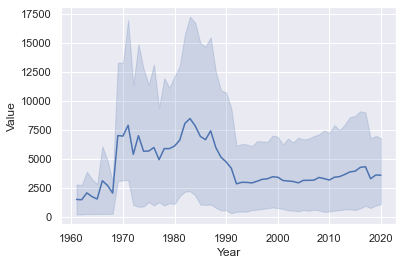

In [31]:
sns.lineplot(x='Year', y = 'Value', data = Land)

What is going on here?  
We have a range and a trend.  Seaborn has seen that we have values for many regions and has shown us the mean and calculated the 95% confidence interval. We can easily change this it standard deviation and use bars instead of shading

<AxesSubplot:xlabel='Year', ylabel='Value'>

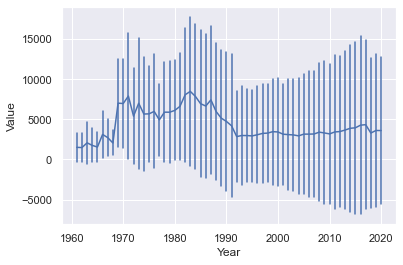

In [37]:
sns.lineplot(x='Year', y = 'Value', data = Land, err_style='bars', ci='sd')

 If we want individual lines for each area we have to tell it to colour them individually:

<AxesSubplot:xlabel='Year', ylabel='Value'>

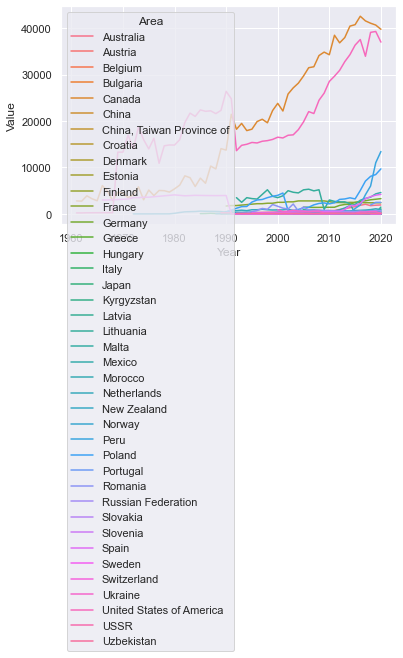

In [33]:
sns.lineplot(x='Year', y = 'Value', data = Land, hue = "Area")

That legend is not helpful here.  We can remove it:

<AxesSubplot:xlabel='Year', ylabel='Value'>

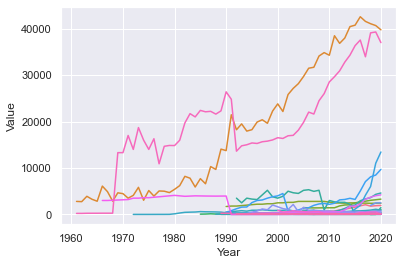

In [45]:
sns.lineplot(x='Year', y = 'Value', data = Land, hue = "Area", legend = False)

Or subset the dataframe to a plot a single country:

<AxesSubplot:xlabel='Year', ylabel='Value'>

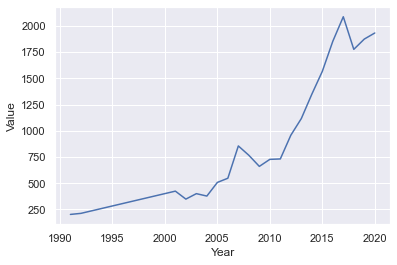

In [35]:
sns.lineplot(x='Year', y = 'Value', data = Land[Land["Area"] == "Australia"])

Or a list of countries:

<AxesSubplot:xlabel='Year', ylabel='Value'>

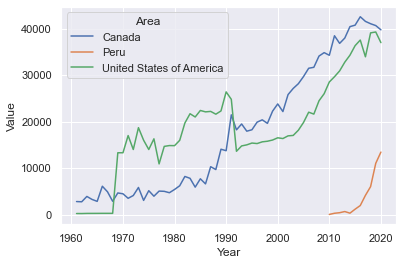

In [44]:
countries = ["United States of America", "Canada", "Peru"]
sns.lineplot(x='Year', y = 'Value', data = Land[Land["Area"].isin(countries)], hue = "Area")

Or put the legend elsewhere:

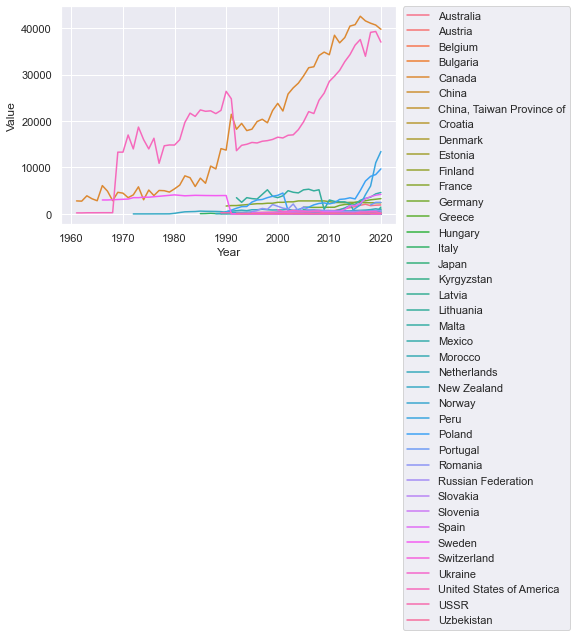

In [49]:
sns.lineplot(x='Year', y = 'Value', data = Land, hue = "Area")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

What is that plt argument?  
This is a call to the libaray underlying seaborn - to matplotlib.    This controls the placement of elements outside the plot.  Seaborn generates the plot from the dataframe and matplotlib.  
To understand how to make better plots with seborn we need to understand the underlying library - matplot lib.

#### Matplotlib

Matplot is the python library for plotting.  It plots data on *Axes* in a *Figure*.  For our purposes the *Figure* is a jupyter notebook cell and the *Axes* is the graph.


In [ ]:
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [ ]:
Here's the anatomy of a matplotlib figure

![title](Parts_of_plot.webp)

In [2]:
!ls

BadGraphs.pptx     Outline.md         Seaborn_plots.png
Class_5.ipynb      Parts_of_plot.webp anatomy.webp


Matplot lib has styles

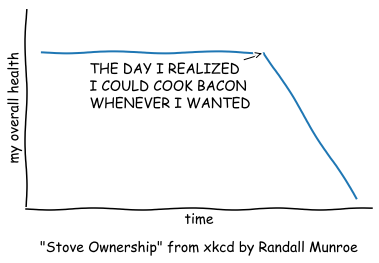

In [6]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Seaborn is a library of styles which works over Matplotlib

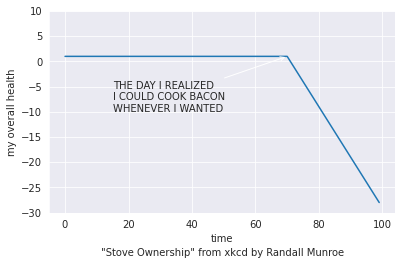

In [15]:
with sns.axes_style("darkgrid"):
    
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)
    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Not as good as a cartoon, but maybe better for publications?